<a href="https://colab.research.google.com/github/RizkiNoor16/Machine-vision-test-challenge/blob/main/Tip_training_object_detection_using_Yolo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Vision Test Challenge

## Tools Preparation

In [1]:
!nvidia-smi

Sun Mar 12 04:55:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/RizkiNoor16/Machine-vision-test-challenge.git

Cloning into 'Machine-vision-test-challenge'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 355 (delta 19), reused 0 (delta 0), pack-reused 301
Receiving objects: 100% (355/355), 77.95 MiB | 41.73 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.5/496.5 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import os
import random
import shutil
import glob
import yaml
import matplotlib.pyplot as plt
import zipfile
import cv2

from PIL import Image
from shutil import copyfile

In [ ]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


## Data Preparation

In [6]:
zip_test = zipfile.ZipFile('/content/Machine-vision-test-challenge/dataset/Test Set_Vision Test.zip')
zip_test.extractall()
zip_test.close()

In [7]:
zip_label = zipfile.ZipFile('/content/Machine-vision-test-challenge/dataset/yolo_label.zip')
zip_label.extractall()
zip_label.close()

In [11]:
#Create folder
image_folder = "/content/Machine-vision-test-challenge/dataset/Augmentasi"
label_folder = "/content/Yolo_label"
train_folder = "data/train"
val_folder = "data/val"
test_folder = 'data/test'

# Create train and test folders
os.makedirs('data')
os.makedirs(train_folder)
os.makedirs(val_folder)
os.makedirs(test_folder)

Train test split

*80%* for Train data

*20%* for val data

*original images from challenge* for test data

In [12]:
# Set split ratio
split_ratio = 0.2

image_files = os.listdir(image_folder)
random.shuffle(image_files)

# Calculate split index
split_index = int(len(image_files) * split_ratio)

# Split image files into train and test
train_images = image_files[split_index:]
val_images = image_files[:split_index]

In [13]:
for image_file in train_images:
    # Copy image file to train folder
    src_image_path = os.path.join(image_folder, image_file)
    dst_image_path = os.path.join(train_folder, image_file)
    copyfile(src_image_path, dst_image_path)
    
    # Copy label file to train folder
    label_file = os.path.splitext(image_file)[0] + ".txt"
    src_label_path = os.path.join(label_folder, label_file)
    dst_label_path = os.path.join(train_folder, label_file)
    copyfile(src_label_path, dst_label_path)

In [14]:
for image_file in val_images:
    # Copy image file to test folder
    src_image_path = os.path.join(image_folder, image_file)
    dst_image_path = os.path.join(val_folder, image_file)
    copyfile(src_image_path, dst_image_path)
    
    # Copy label file to test folder
    label_file = os.path.splitext(image_file)[0] + ".txt"
    src_label_path = os.path.join(label_folder, label_file)
    dst_label_path = os.path.join(val_folder, label_file)
    copyfile(src_label_path, dst_label_path)

In [15]:
source_directory = '/content/test set'
for file_name in os.listdir(source_directory):
    shutil.move(os.path.join(source_directory, file_name), test_folder)

## Create data yaml file for training

In [ ]:
tip_yaml = f"""
    train: /content/data/train
    val: /content/data/val
    test : /content/data/test
    nc: 2
    names:
        0 : Good_tip
        1 : Bad_tip
    """

with open('tip.yaml', 'w') as f:
    f.write(tip_yaml)
    
%cat tip.yaml


    train: /content/data/train
    val: /content/data/val
    test : /content/data/test
    nc: 2
    names:
        0 : Good_tip
        1 : Bad_tip
    

## Training model

In [ ]:
model = YOLO("yolov8n.pt") 
model.train(data="tip.yaml", epochs=25)

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=tip.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=Non

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [ ]:
model.val(data="tip.yaml")

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/data/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]
                   all         50         50       0.94      0.924      0.992      0.691
              Good_tip         50         12          1      0.849      0.995      0.651
               Bad_tip         50         38      0.879          1      0.989      0.732
Speed: 4.0ms preprocess, 5.3ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/val


## Performance Evaluation

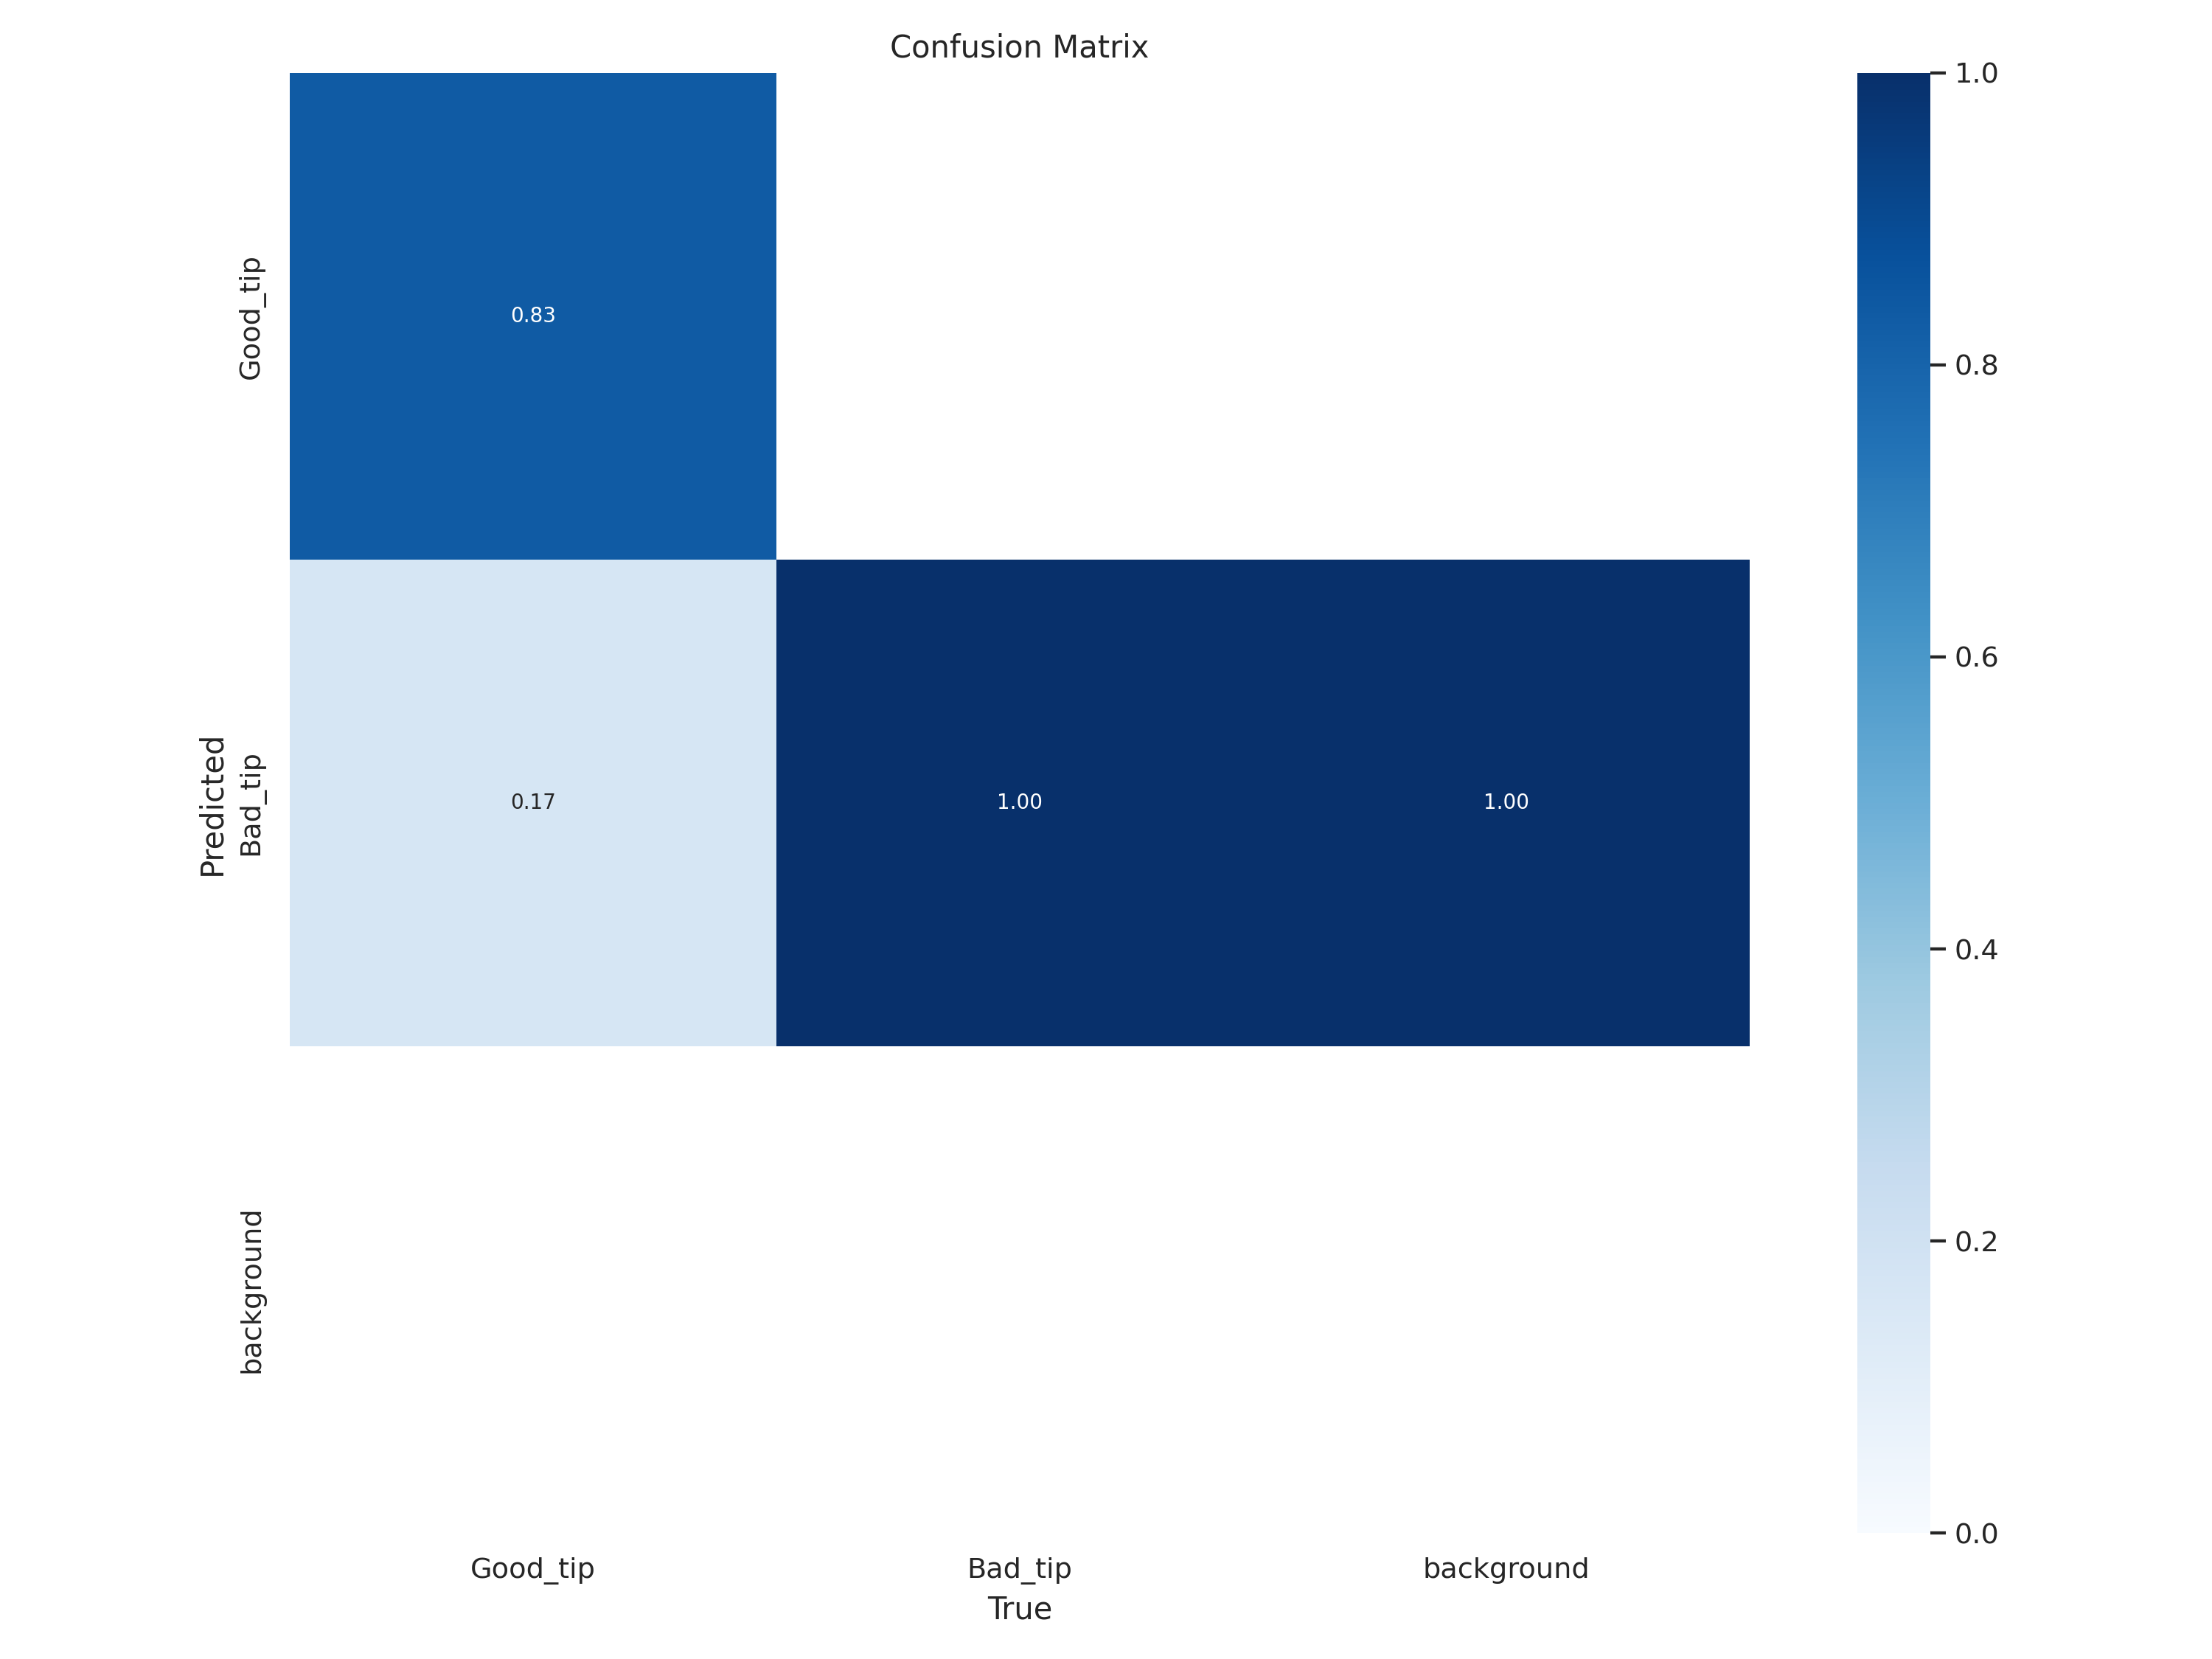

In [ ]:
from google.colab.patches import cv2_imshow
cm = cv2.imread('/content/runs/detect/val/confusion_matrix.png')
cv2_imshow(cm)

**BEFORE** : Validation label

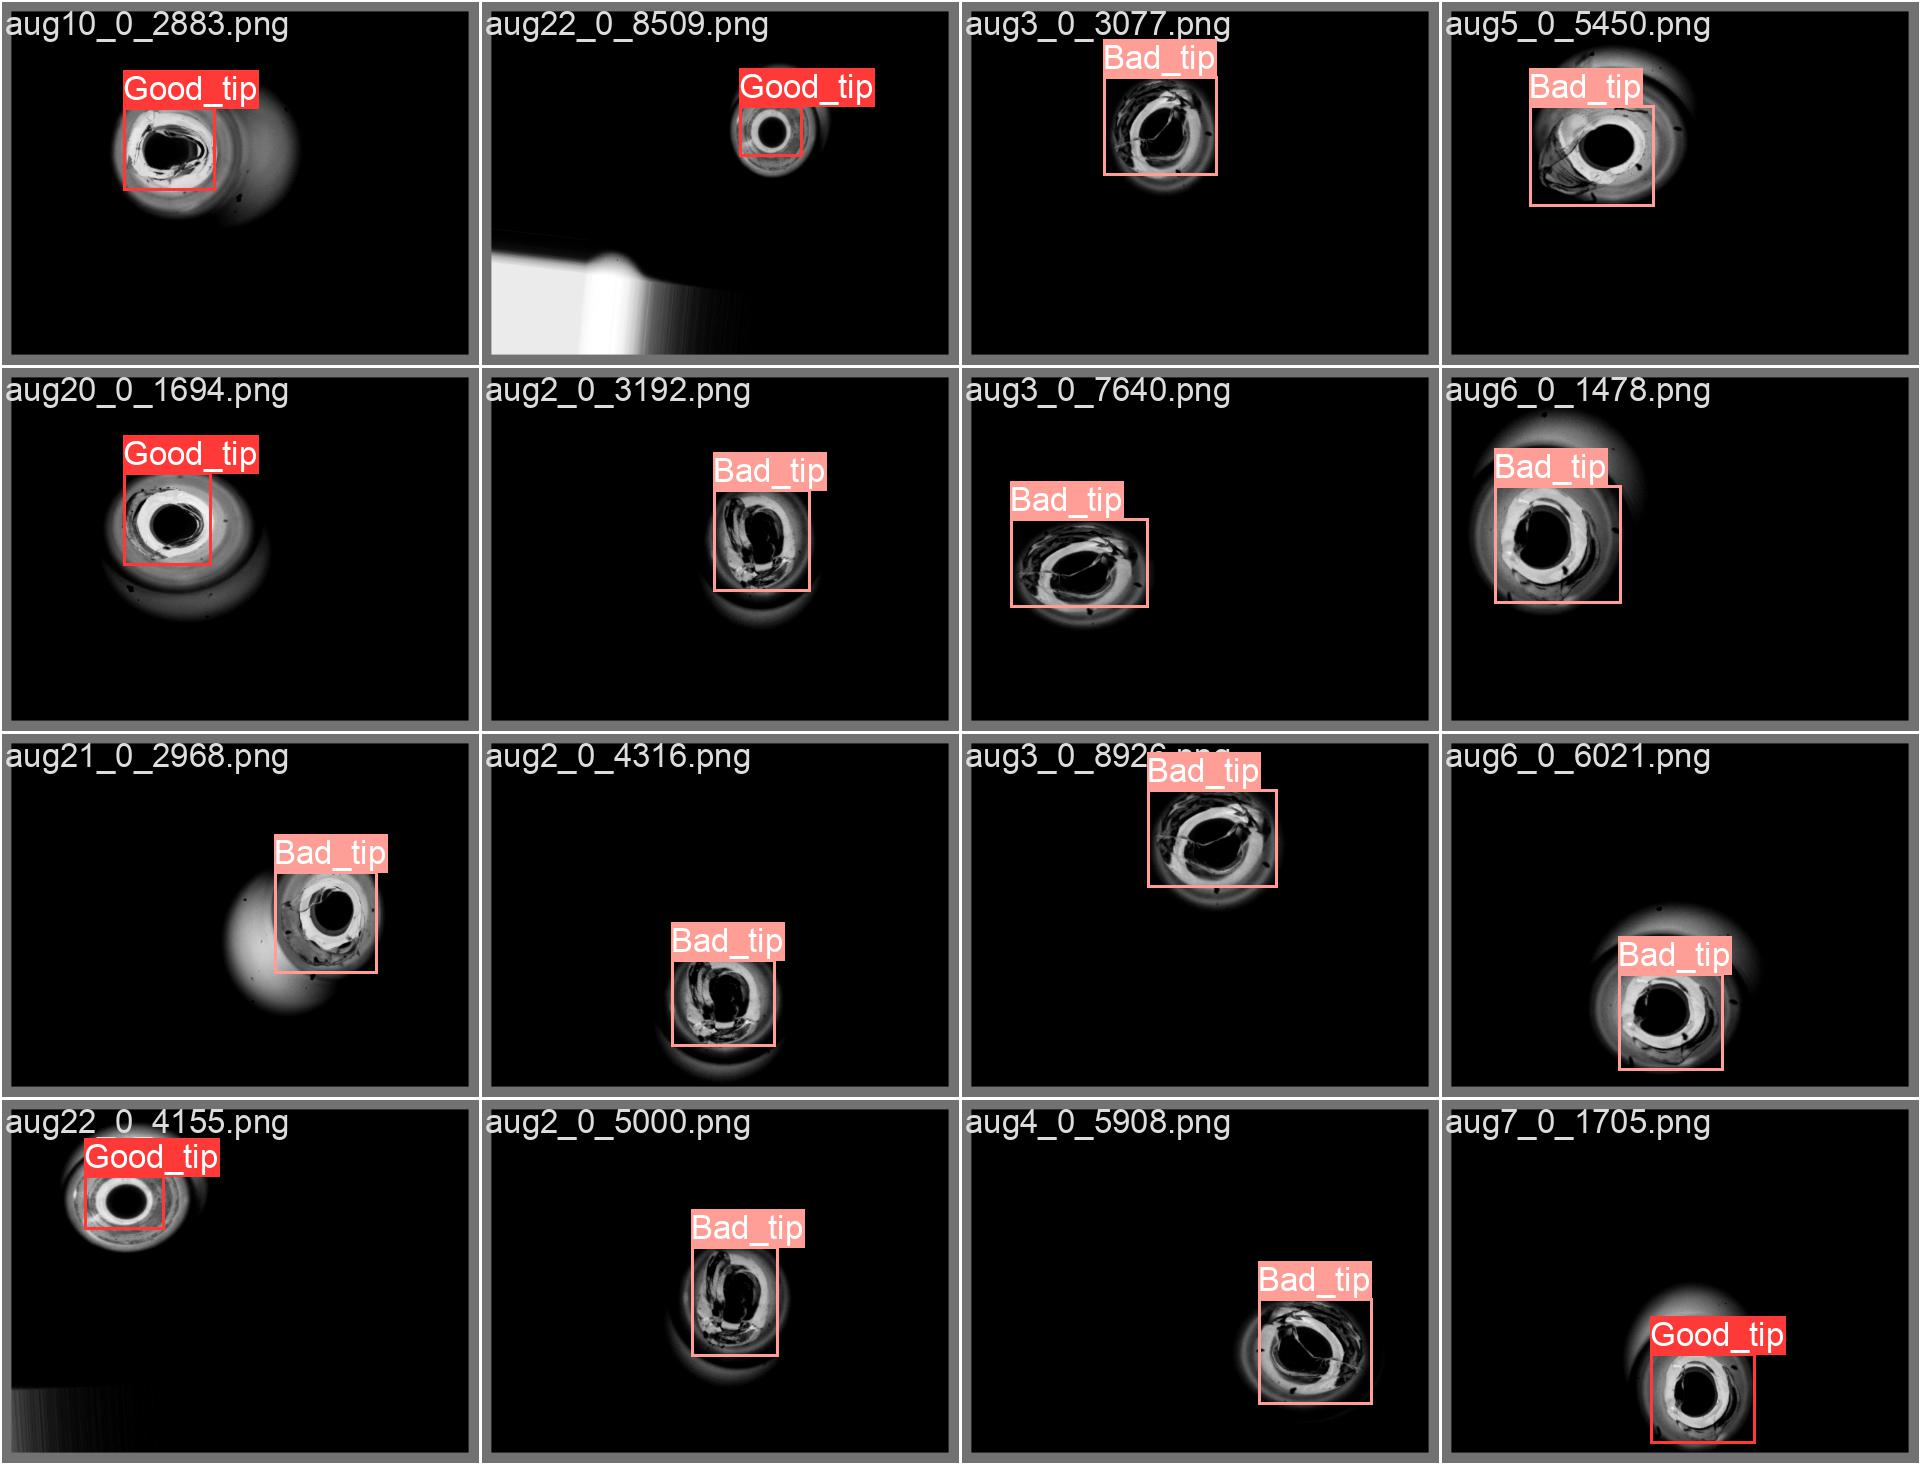

In [ ]:
val_label =cv2.imread("/content/runs/detect/val/val_batch0_labels.jpg")

cv2_imshow(val_label)

**AFTER** : Validation Predictions

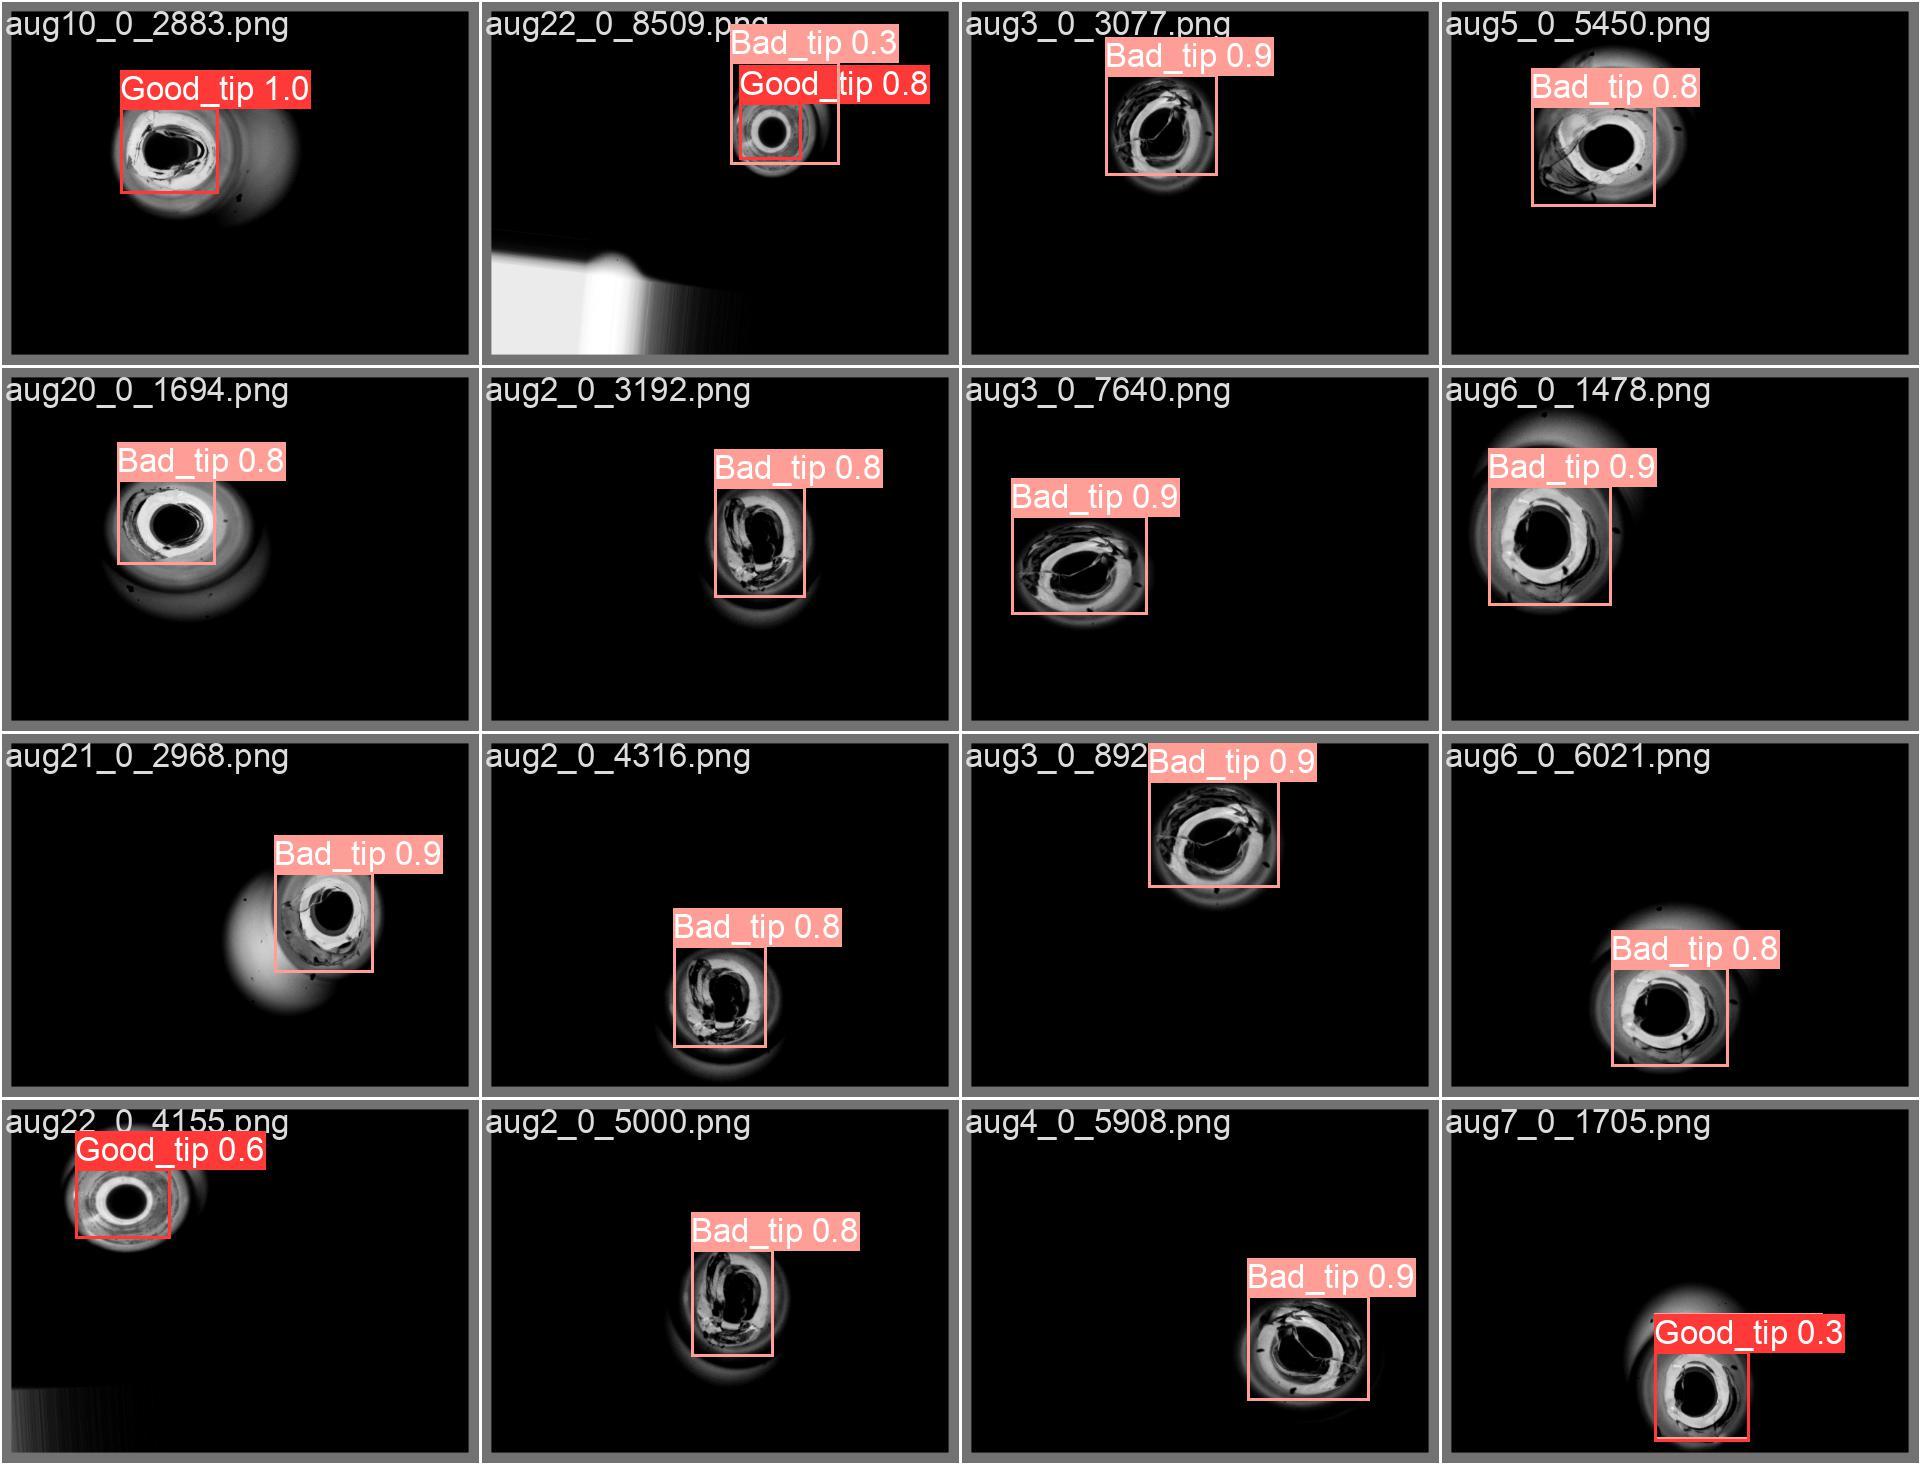

In [ ]:
val_pred = cv2.imread("/content/runs/detect/val/val_batch0_pred.jpg")
cv2_imshow(val_pred)

## Model Prediction

In [ ]:
model = YOLO(model='/content/runs/detect/train/weights/best.pt')

In [ ]:
for img_file in glob.glob(os.path.join(test_folder, '*.png')):
  pred_img = cv2.imread(image_file)

  result =  model.predict(img_file, save=True, line_thickness=1)


image 1/1 /content/data/test/6680.png: 480x640 1 Bad_tip, 20.6ms
Speed: 0.6ms preprocess, 20.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/data/test/5655.png: 480x640 1 Bad_tip, 13.9ms
Speed: 0.5ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/data/test/4752.png: 480x640 1 Bad_tip, 15.8ms
Speed: 0.5ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/data/test/5146.png: 480x640 1 Bad_tip, 13.8ms
Speed: 0.5ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/data/test/6369.png: 480x640 1 Bad_tip, 13.5ms
Speed: 0.5ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


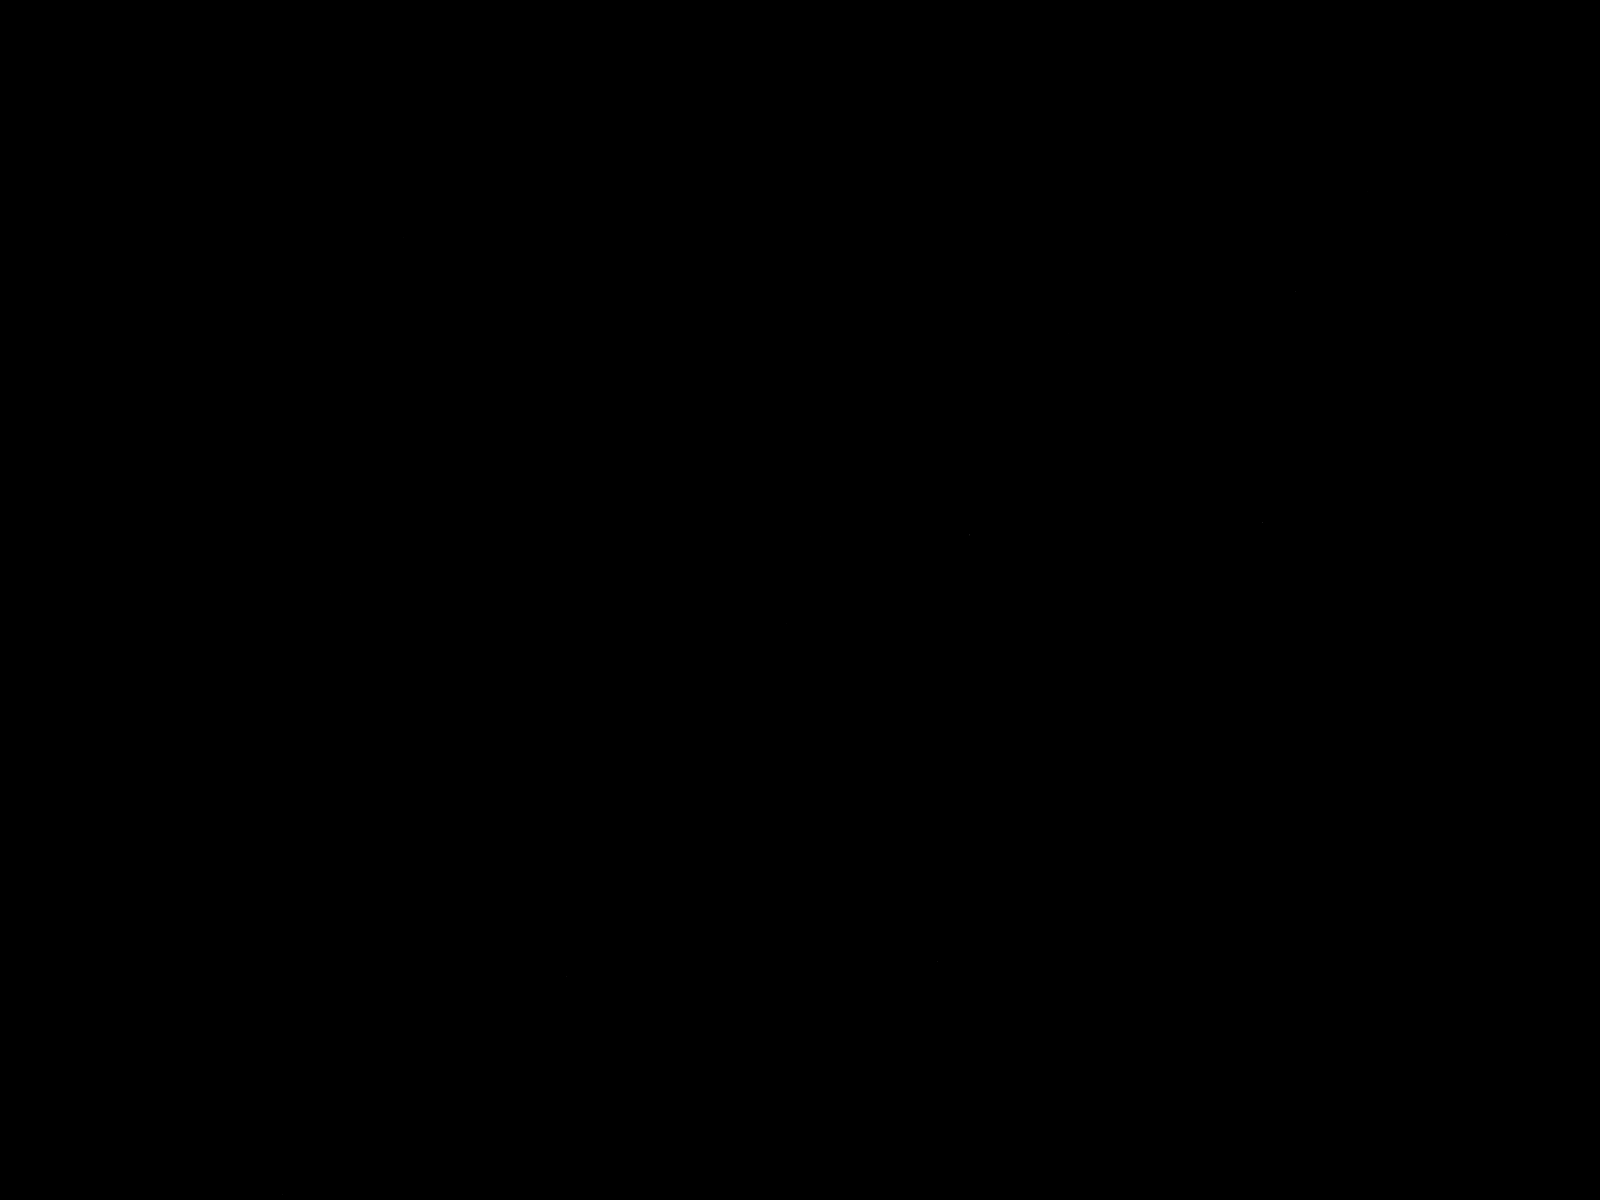

In [ ]:
pred_1 = cv2.imread('/content/runs/detect/predict/44.png')
cv2_imshow(pred_1)

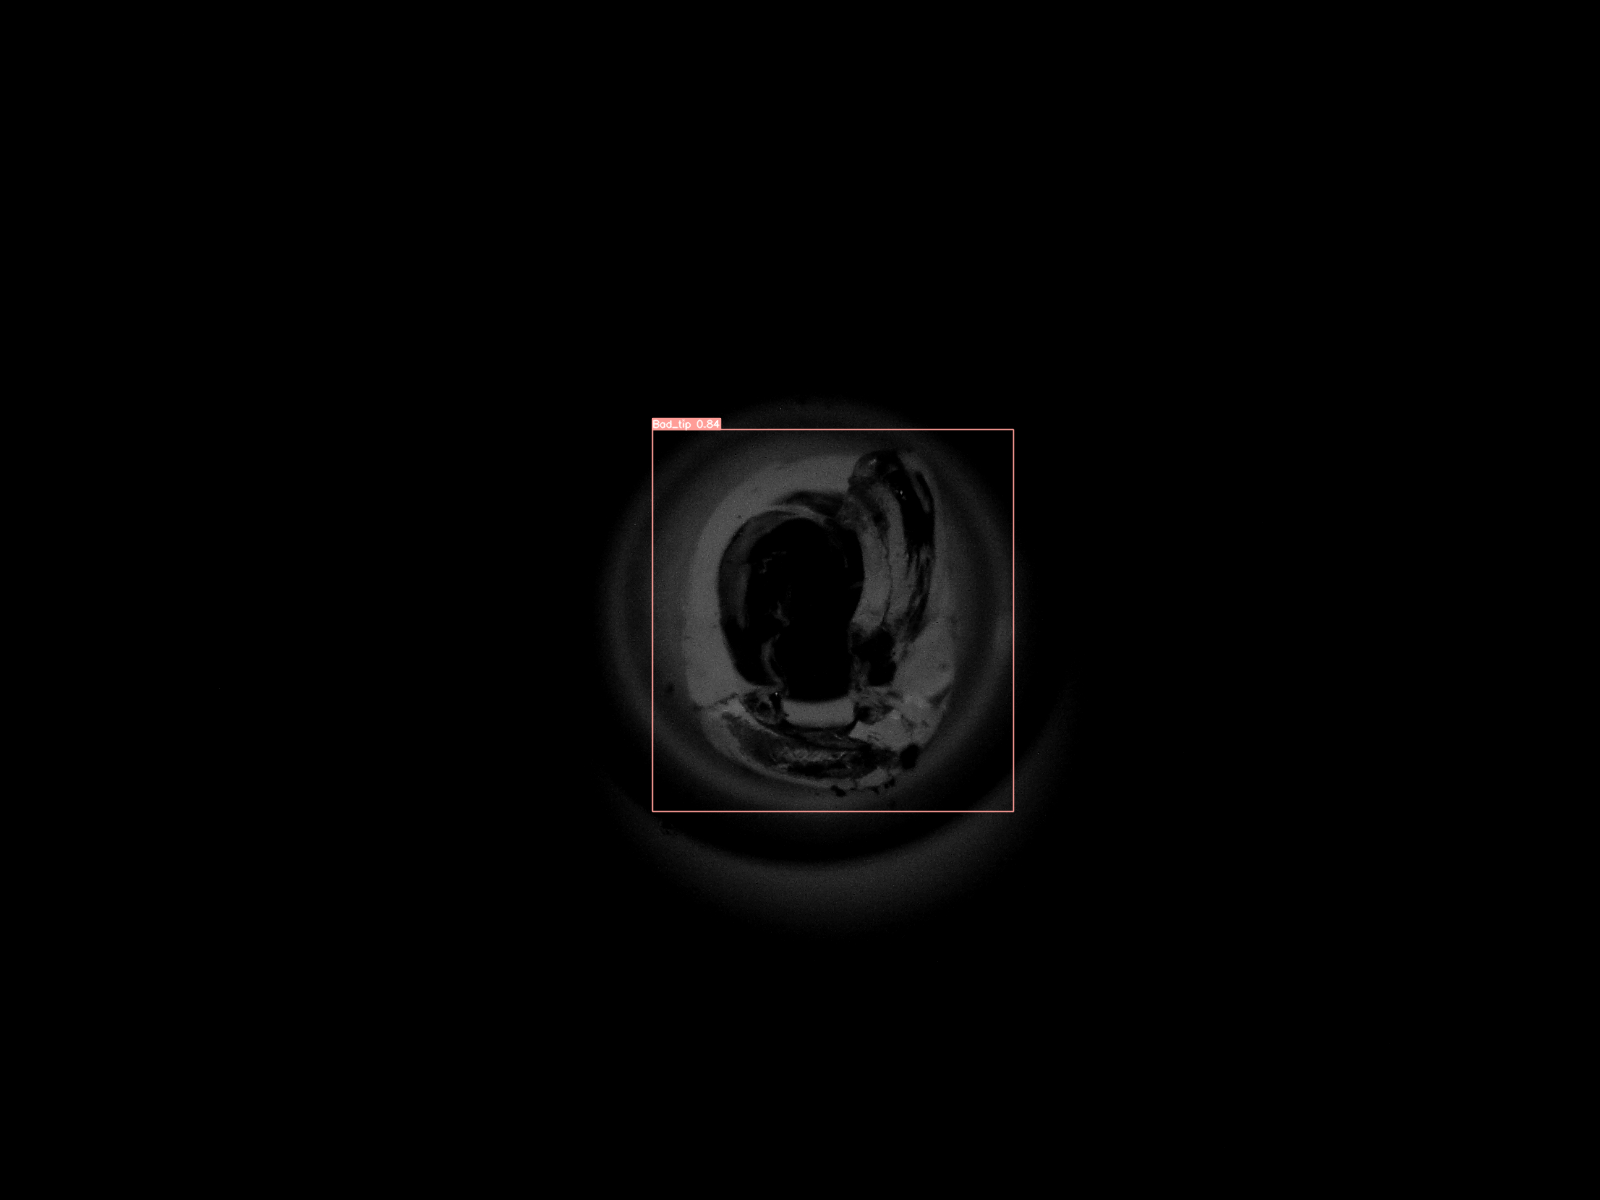

In [ ]:
pred_2 = cv2.imread('/content/runs/detect/predict/4901.png')
cv2_imshow(pred_2)

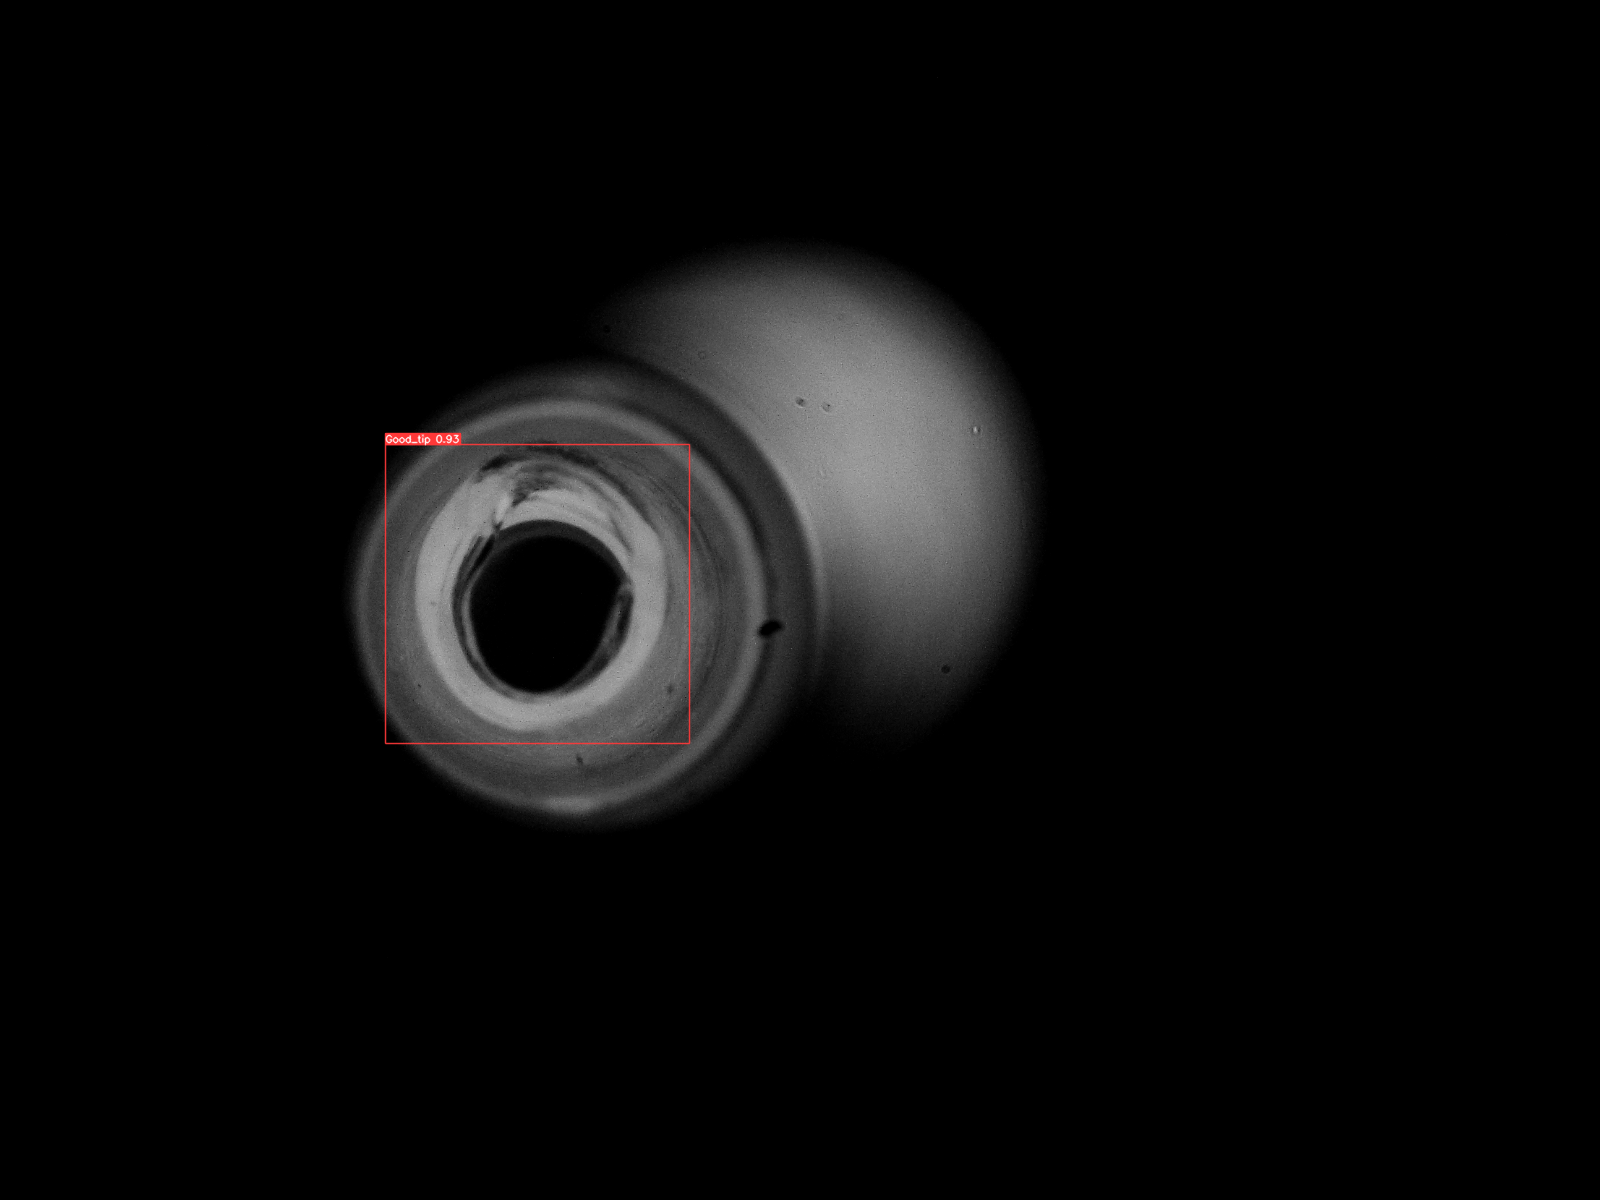

In [ ]:
pred_3 = cv2.imread('/content/runs/detect/predict/5451.png')
cv2_imshow(pred_3)

In [ ]:
shutil.make_archive('model_result1', 'zip', '/content/runs/detect')

'/content/model_result1.zip'